# Non-linear Transformation

### Basic Setup

In [97]:
# Import packages
import numpy as np
import sklearn

In [98]:
# For plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [99]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [110]:
# Generate 100 datapoints (X, y)
# Generate 100 random numbers X between -3 and +3
# Generate y as 0.5x^2 + x + 2 + eps
# where eps is a random number between 0 and 1
import random
from random import randint


m = 100
X = []
y = []

for _ in range(100):
    x = random.randint(-3,3)
    yy = 0.5 * (x * x) + x + 2 + random.uniform(0,1)
    X.append(x)
    y.append(yy)

X = np.array(X)
print(X)
print(len(X))
y = np.array(y)
print(y)
print(len(y))

[ 1 -2  1  1  0 -2  2  0  0  3 -2 -2  3 -1  1 -3 -3 -3 -3 -3  1 -1 -2  1
  1  2 -2 -3 -2 -3 -3  2  0 -2 -3  0  3 -1 -1  0 -2  0 -1  3  1  0  2  3
  1  2  1 -3 -3  0  3 -1 -2  3 -1  0  0 -1  0  0  1  2 -1 -3  2 -1  3  3
 -2  0  0  2  0  0  0 -3  1 -1 -3  3  2  2  3 -2 -1  2  3  0  1  0  0 -1
  0  2  2  0]
100
[ 3.97062917  2.82162037  4.19671305  3.6554883   2.60326345  2.29539997
  6.9187135   2.38120285  2.64089058 10.2560354   2.88418543  2.96758001
  9.72245849  1.55567176  4.0852311   4.41317298  3.74024464  4.40262139
  3.54983765  3.51902615  4.24716668  2.22077677  2.774887    3.80919307
  3.81728258  6.74674453  2.23760806  4.28745064  2.79016942  4.39323562
  4.28663925  6.64004666  2.41595369  2.97301943  4.2017081   2.73359647
  9.71463498  1.97584061  2.14250593  2.85922868  2.75455213  2.19302983
  2.40614596 10.08994454  4.32485916  2.35991665  6.21688337  9.66982237
  4.07040275  6.85942426  3.58230637  3.62706944  4.35407839  2.66062911
 10.11710384  1.74016758  2.23567

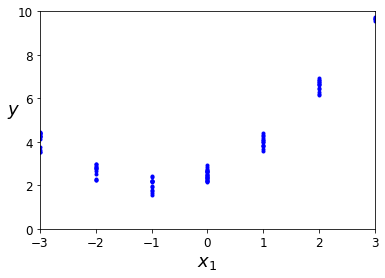

In [111]:
# Let's visualize the data generated
# It should look like a parabola

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Polynomial Regression

In [112]:
# Import PolynomialFeatures package from sklearn
from sklearn.preprocessing import PolynomialFeatures


In [113]:
# Initialize Polynomical features transformation object with degree 2

poly_features = PolynomialFeatures(degree=2)

In [114]:
# Transform the generated points X to degree 2 polynomial

X_poly = poly_features.fit_transform(X.reshape(-1, 1))

In [115]:
# Lets see the value of X[0] and its transformed X_poly[0]
print("X[0]: ", X[0])
print("X_poly[0]: ", X_poly[0])

X[0]:  1
X_poly[0]:  [1. 1. 1.]


In [116]:
# Import LinearRegression from sklearn and initialize its object

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [117]:
# Fit the transformed polynomial features X_poly and values y

lin_reg.fit(X_poly, y)

LinearRegression()

In [118]:
# Lets see the intercept and coefficients of the learned model
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: 2.516554685677449
Coefficients: [0.         0.98032986 0.50746045]


In [119]:
# Generate 100 new datapoints X_new between -3 and +3
# Transform into degree 2 polynomial X_new_poly
# Predict the y_new values using the fitted model

m = 100

X_new = []
for i in range(100):
    x = random.randint(-3,3)
    X_new.append(x)
    
X_new = np.array(X_new)

X_new_poly = poly_features.fit_transform(X_new.reshape(-1, 1))

y_new = lin_reg.predict(X_new_poly)

No handles with labels found to put in legend.


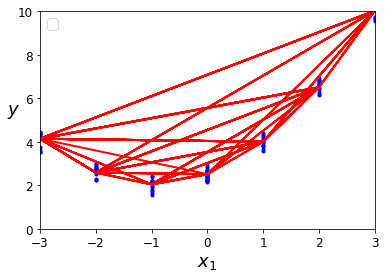

In [120]:
# Let's visualize the generated data and the learned function
# You should see a red curve running through the middle of the parabola data 

plt.plot(X, y, "b.") # plots data
plt.plot(X_new, y_new, "r-", linewidth=2) # plots function
# plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") # plots function
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()